In [5]:
import requests
import matplotlib.pyplot as plt
import datetime
from pandas import DataFrame

In [2]:
def fetch_wild_price_data(num_days=20):
    """Fetch WILD token price data from CoinGecko API"""
    url = f"https://api.coingecko.com/api/v3/coins/wilder-world/market_chart?vs_currency=usd&days={num_days}&interval=daily"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data['prices']
    else:
        print(f"Error: {response.status_code}")
        return None

def convert_unix_timestamp_to_datetime(timestamp):
    """Convert unix timestamp (milliseconds) to datetime object"""
    return datetime.datetime.fromtimestamp(timestamp/1000)

def plot_wild_price(data):
    """Plot WILD price against date"""
    dates = list(data.keys())
    prices = list(data.values())
    
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, marker='o', linestyle='-', linewidth=2, markersize=6)
    plt.title('WILD Token Price Over Last 20 Days', fontsize=14, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


WILD Token Price Data:
               Date    Price
2024-10-31 00:00:00 0.229876
2024-11-01 00:00:00 0.218921
2024-11-02 00:00:00 0.218294
2024-11-03 00:00:00 0.216719
2024-11-04 00:00:00 0.215474
2024-11-05 00:00:00 0.212172
2024-11-06 00:00:00 0.214774
2024-11-07 00:00:00 0.236462
2024-11-08 00:00:00 0.249415
2024-11-09 00:00:00 0.247623
2024-11-10 00:00:00 0.261102
2024-11-11 00:00:00 0.294785
2024-11-12 00:00:00 0.340964
2024-11-13 00:00:00 0.322756
2024-11-14 00:00:00 0.297815
2024-11-15 00:00:00 0.267658
2024-11-16 00:00:00 0.246063
2024-11-17 00:00:00 0.245869
2024-11-18 00:00:00 0.245700
2024-11-19 00:00:00 0.243254
2024-11-19 23:10:46 0.242114


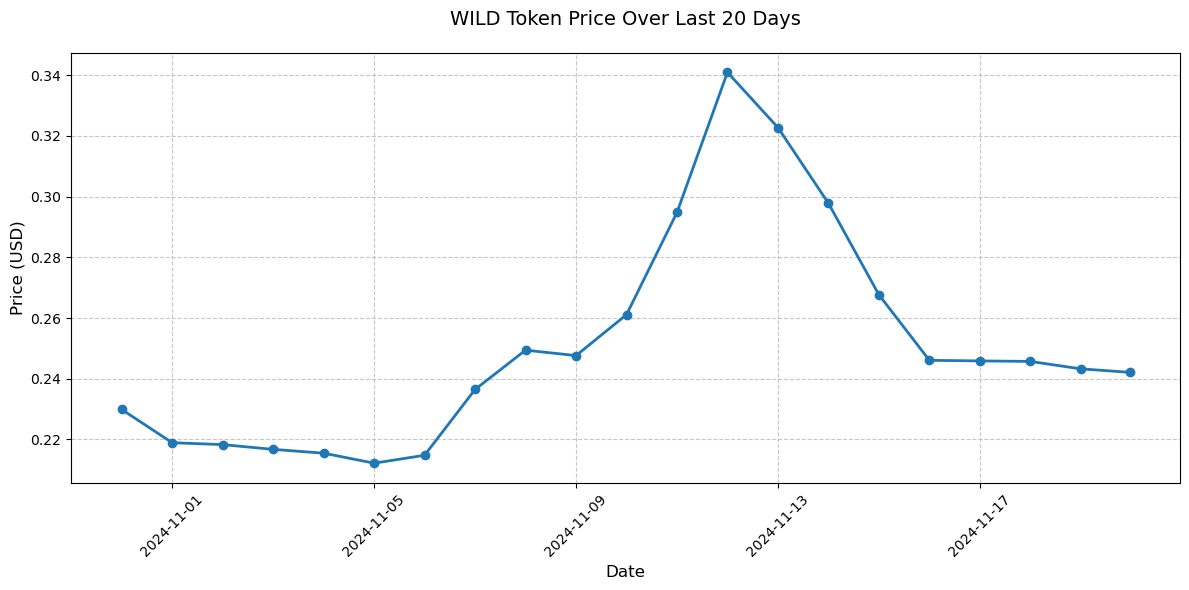

In [4]:
# Fetch 20 days of price data
price_data = fetch_wild_price_data(20)

if price_data is None:
    print("Failed to fetch price data")
else:
    # Convert the data into a dictionary with datetime keys and price values
    price_dict = {
        convert_unix_timestamp_to_datetime(timestamp): price 
        for timestamp, price in price_data
    }
    
    # Sort the dictionary by date
    price_dict = dict(sorted(price_dict.items()))
    
    # Create a DataFrame for better data visualization
    df = DataFrame(list(price_dict.items()), columns=['Date', 'Price'])
    print("\nWILD Token Price Data:")
    print(df.to_string(index=False))
    
    # Plot the data
    plot_wild_price(price_dict)